In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def ridge_regression(X, y, lambda_val):
    """
    Perform ridge regression to estimate the coefficients of a linear model.

    Parameters:
    X : The input matrix of shape (n_samples, n_features)
    y : The target vector of shape (n_samples)
    lambda_val : The regularization parameter

    Returns:
    w: The estimated coefficients of the linear model
    """
    I = np.eye(X.shape[1])
    I[0,0] = 0
    reg_term = lambda_val * I # creates the regularization term, lambda * I 
    w = np.linalg.solve(X.T @ X + reg_term, X.T @ y) # solves for w using (X^T * X + lambda * I)^-1 * X^T * y
    return w

alpha: 0 gives W: [-5.92175799e-09  1.47248771e+05 -1.52418060e+06  3.68650211e+06
 -2.50703556e+06 -1.56754035e+06  2.64755449e+06 -8.82549391e+05]
alpha: 1e-05 gives W: [ 4.50906093e-16 -4.11498118e+01 -8.99905552e-01  2.32795512e+01
  3.15181252e+01  2.39574392e+01  7.50942201e-01 -3.79363466e+01]
alpha: 0.002 gives W: [-4.66533406e-16 -1.73507591e+00 -9.97927927e-01 -3.69725207e-01
  1.50016308e-01  5.61866710e-01  8.66481144e-01  1.06459864e+00]
alpha: 0.05 gives W: [-4.51896843e-16 -7.79251911e-01 -5.34277344e-01 -2.93511369e-01
 -5.70108294e-02  1.75170822e-01  4.02983604e-01  6.26381070e-01]
alpha: 0.1 gives W: [-4.44779469e-16 -5.33876150e-01 -3.74265676e-01 -2.16731203e-01
 -6.13142840e-02  9.19452170e-02  2.43009178e-01  3.91841276e-01]
alpha: 1 gives W: [-4.32149978e-16 -1.30621767e-01 -1.08510109e-01 -8.65980794e-02
 -6.48920071e-02 -4.33980570e-02 -2.21222209e-02 -1.07030941e-03]


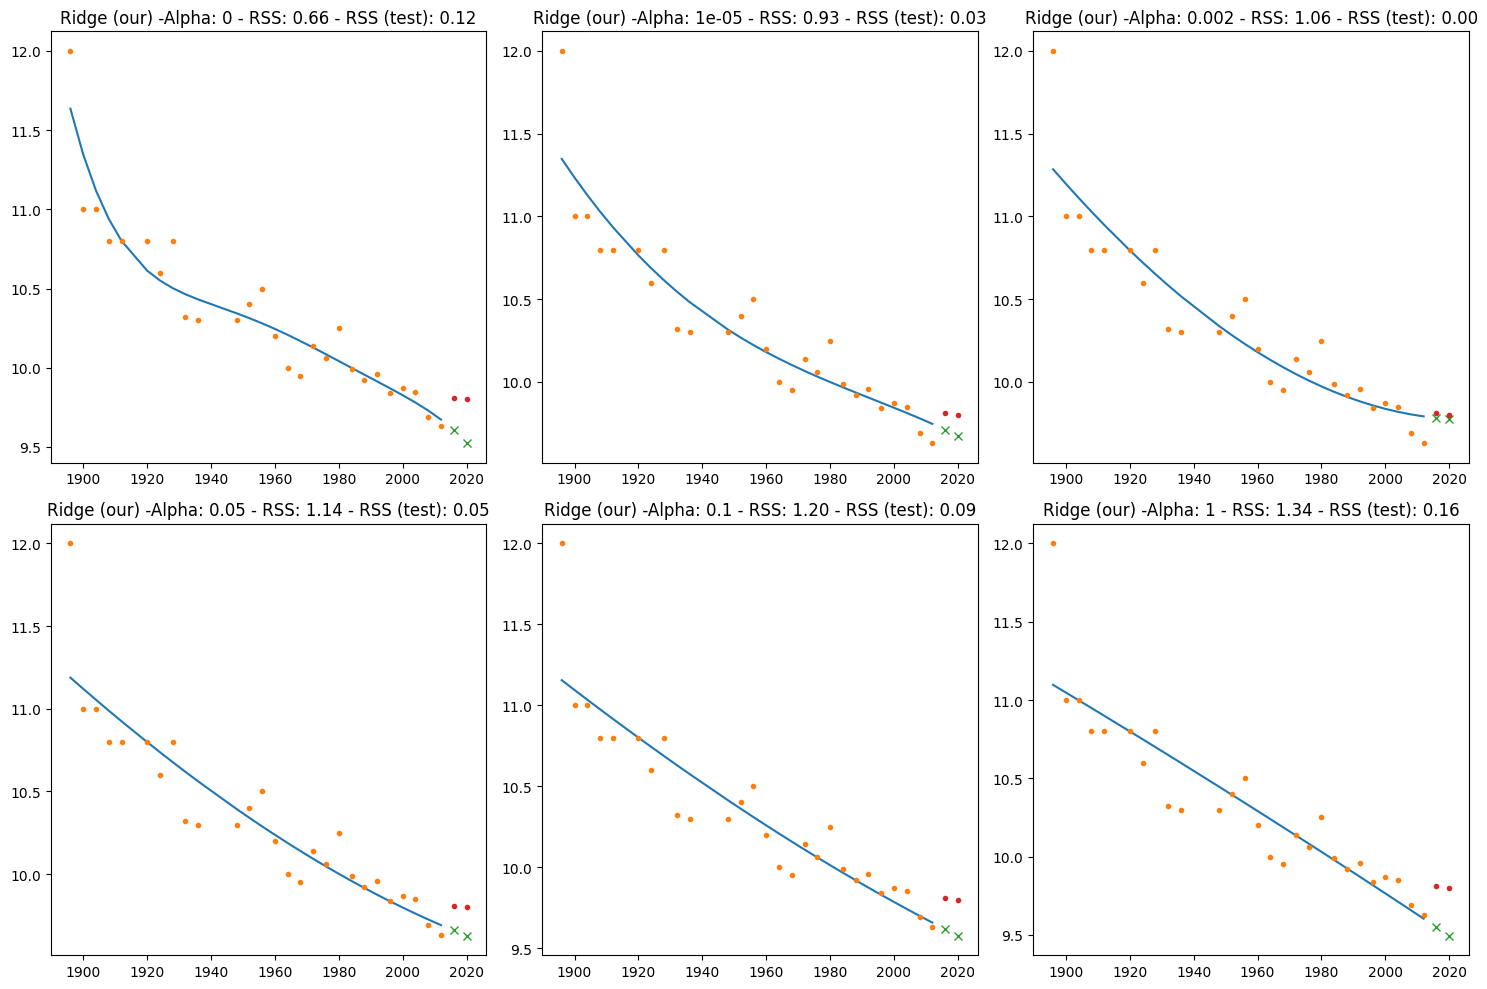

In [11]:
ds = pd.read_csv('olympics_100m.csv', sep=',')

training, testing = ds[:-2], ds[-2:]

X_train = training['Year'].values.reshape(-1,1) # type: ignore
y_train = training['Time'].values
X_test = testing['Year'].values.reshape(-1,1) # type: ignore
y_test = testing['Time'].values

poly = PolynomialFeatures(7) # creates a polynomial feature transformer of degree 7
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler() # creates a standard scaler and fits it to the training data
X_train_poly[:,1:] = scaler.fit_transform(X_train_poly[:,1:]) 
X_test_poly[:,1:] = scaler.transform(X_test_poly[:,1:]) # type: ignore

plt.rcParams['figure.figsize'] = [15, 10]
alphas = [0, 0.00001, 0.002, 0.05, 0.1, 1]
for count, alpha in enumerate(alphas):
    w = ridge_regression(X_train_poly, y_train - y_train.mean(), alpha) # type: ignore
    y_hat_train = np.dot(X_train_poly, w) + y_train.mean() # type: ignore
    y_hat_test = np.dot(X_test_poly, w) + y_train.mean() # type: ignore
    print(f'alpha: {alpha} gives W: {w}')
    plt.subplot(231+count)
    plt.tight_layout()
    plt.plot(X_train[:,0], y_hat_train)
    plt.plot(X_train[:,0], y_train, '.') # type: ignore
    plt.plot(X_test[:,0], y_hat_test, 'x')
    plt.plot(X_test[:,0], y_test, '.') # type: ignore

    rss_train = np.sum((y_train - y_hat_train) ** 2) # calculates the RSS
    rss_test = np.sum((y_test - y_hat_test) ** 2)
    plt.title(f'Ridge (our) -Alpha: {alpha} - RSS: {rss_train:.2f} - RSS (test): {rss_test:.2f}')

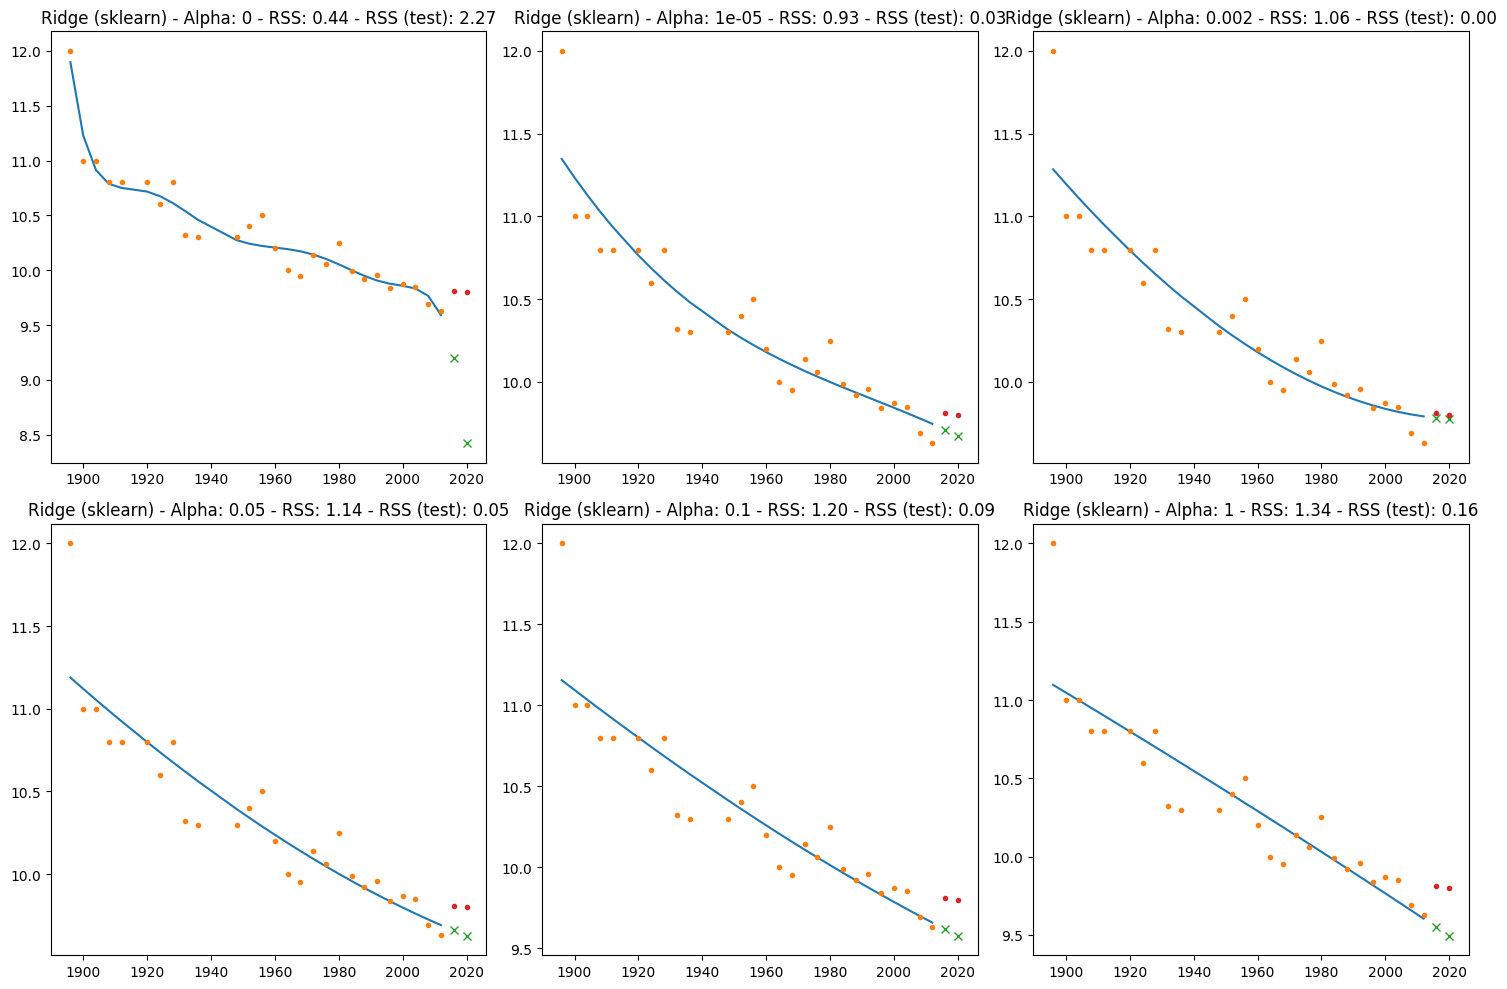

In [10]:
from sklearn.linear_model import Ridge

# Training Ridge regression models using sklearn
ridge_models = [Ridge(alpha=alpha) for alpha in alphas]

# Plotting the Ridge regression results using sklearn
for count, model in enumerate(ridge_models):
    model.fit(X_train_poly, y_train) # type: ignore
    y_hat_train_ridge = model.predict(X_train_poly)
    y_hat_test_ridge = model.predict(X_test_poly)

    plt.subplot(231+count)
    plt.tight_layout()
    plt.plot(X_train[:,0], y_hat_train_ridge)
    plt.plot(X_train[:,0], y_train, '.') # type: ignore
    plt.plot(X_test[:,0], y_hat_test_ridge, 'x')
    plt.plot(X_test[:,0], y_test, '.') # type: ignore

    rss_train_ridge = np.sum((y_train - y_hat_train_ridge) ** 2)
    rss_test_ridge = np.sum((y_test - y_hat_test_ridge) ** 2)
    plt.title(f'Ridge (sklearn) - Alpha: {alphas[count]} - RSS: {rss_train_ridge:.2f} - RSS (test): {rss_test_ridge:.2f}')

Both the sklearn library and our Ridge function produce similar plots, indicating that they are both performing effectively.
 
The plots show the line of best fit through the data points, representing the model’s predictions.

The sklearn plot that uses alpha 0 has a smoother curve fitting the data points, while the curve from our Ridge function is slightly more rigid and linear. This could be due to differences in the implementation of the algorithm.